<a href="https://colab.research.google.com/github/Shamil2007/Machine-Learning/blob/main/TitanicDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
!kaggle datasets download yasserh/titanic-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
titanic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [115]:
!unzip /content/titanic-dataset.zip

Archive:  /content/titanic-dataset.zip
replace Titanic-Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Titanic-Dataset.csv     


In [116]:
import pandas as pd  # For data manipulation
import numpy as np    # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs

In [117]:
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [118]:
# Checking the data types and non-null counts of each column in the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [119]:
# Calculating the correlation of numerical features with the 'Survived' column and sorting them in descending order

df.corr(numeric_only=True)['Survived'].sort_values(ascending=False)

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


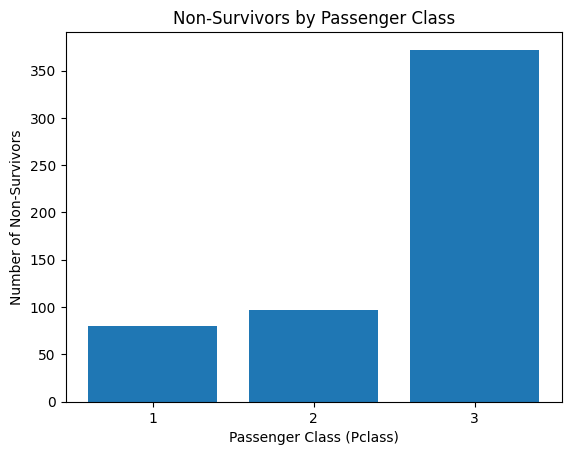

In [120]:
import matplotlib.pyplot as plt

# Filter for passengers who did not survive
not_survived = df[df['Survived'] == 0]

# Count the number of non-survivors in each class
non_survival_counts = not_survived['Pclass'].value_counts().sort_index()

plt.bar(non_survival_counts.index, non_survival_counts.values)
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Number of Non-Survivors')
plt.title('Non-Survivors by Passenger Class')
plt.xticks([1, 2, 3])
plt.show()

In [121]:
# Removes specified columns from the dataframe

df.drop(columns=['PassengerId', 'Ticket', 'Fare', 'Cabin', 'Name'], inplace = True)

In [122]:
# Splitting the dataset into features (X) and target (y)

X = df.drop('Survived', axis = 1)
y = df['Survived'].copy()

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [124]:
# Splitting the features into numerical (Num) and categorical (Cat) columns

X_num_train = X_train.select_dtypes(include = np.number)
X_cat_train = X_train.select_dtypes(include = 'object')

In [125]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [126]:
X_num = Pipeline([
    ('Scaler', StandardScaler()),
    ('Impute', SimpleImputer(strategy = 'median'))
])

X_cat = Pipeline([
    ('Imputer_cat', SimpleImputer(strategy = 'most_frequent')),
    ('Encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

transformer = ColumnTransformer([
    ('X_num', X_num, X_num_train.columns),
    ('X_cat', X_cat, X_cat_train.columns)
], remainder = 'passthrough')

In [127]:
from sklearn.ensemble import RandomForestClassifier

full_pipeline_forest = make_pipeline(transformer, RandomForestClassifier())
full_pipeline_forest.fit(X_train, y_train)
full_pipeline_forest.score(X_train, y_train) * 100

93.67977528089888

In [128]:
full_pipeline_forest.score(X_test, y_test) * 100

81.56424581005587

In [129]:
from sklearn.tree import DecisionTreeClassifier

full_pipeline_tree = make_pipeline(transformer, DecisionTreeClassifier())
full_pipeline_tree.fit(X_train, y_train)
full_pipeline_tree.score(X_train, y_train) * 100

93.67977528089888

In [130]:
full_pipeline_tree.score(X_test, y_test) * 100

77.6536312849162

In [131]:
from sklearn.linear_model import LogisticRegression

full_pipeline_logistic = make_pipeline(transformer, LogisticRegression())
full_pipeline_logistic.fit(X_train, y_train)
full_pipeline_logistic.score(X_train, y_train) * 100

80.0561797752809

In [132]:
full_pipeline_logistic.score(X_test, y_test) * 100

81.00558659217877